# Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature|
|	INCOME	|	연 수입액(달러)	|feature|
|	OVERAGE	|	월 초과사용 시간(분)	|feature|
|	LEFTOVER	|	월 사용 잔여시간(%)	|feature|
|	HOUSE	|	집 가격(달러)	|feature|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 대학졸업 여부(범주형)에 따라 이탈여부에 차이가 있다. 

* 가설2 : 월 사용 잔여시간(숫자형)에 따라 이탈여부에 차이가 있다.

* 가설3 : 핸드폰 가격(숫자형)에 따라 이탈여부에 차이가 있다.

* 가설4 : 만족도 설문(범주형)에 따라 이탈여부에 차이가 있다.

* 가설5 : 변경 계획 설문(범주형)에 따라 이탈여부에 차이가 있다.

* 가설6 : 평균 통화시간(숫자형)에 따라 이탈여부에 차이가 있다.

* 가설7 : 월 초과사용 시간(숫자형)에 따라 이탈여부에 차이가 있다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### vscode랑 주피터노트북이랑 마크다운이 다르게 나옵니다 ㅠㅠ

### 1) COLLEGE

In [119]:
var = 'COLLEGE'

1) 변수의 비즈니스 의미
    * 대학 졸업여부(1,0)
    * feature
2) 숫자, 범주?
    * 범주
3) NaN 존재 유무 및 조치방안
    * NAN 없음
4) 가변수화 필요 여부
    * 필요 없음

In [126]:
mobile[var].isna().sum()

0

5) 기초통계량(수치화)

In [127]:
# 범주별 빈도수
print(mobile[var].value_counts())
print('***************************')
# 범주별 비율
print(mobile[var].value_counts() / mobile[var].shape[0])

1    9049
0    8951
Name: COLLEGE, dtype: int64
***************************
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


6) 분포 확인(시각화)

In [128]:
cnt = mobile[var].value_counts()

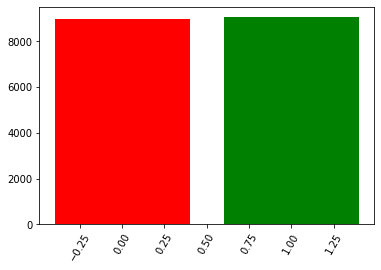

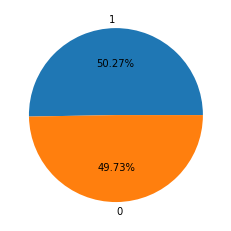

In [130]:
plt.bar( cnt.index, cnt.values, color = ['g','r'])
plt.xticks(rotation=60)
plt.show()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

7) 분석내용
    - 졸업: 50.27%, 미졸업:49.73%
    - 거의 반반 정도 비율을 보이고 있다.
    - 추가 분석내용
        - 졸업여부와 핸드폰 가격을 비교함으로써 경제적 여유 정도를 파악하고 싶다.

### 2) LEFTOVER (월 사용 잔여시간 %)

In [34]:
var = 'LEFTOVER'

1) 변수의 비즈니스 의미
    * 월 사용 잔여시간(단위 : %) 
    * feature
2) 숫자, 범주?
    * 숫자
3) NaN 존재 유무 및 조치방안
    * NAN 없음
4) 가변수화 필요 여부
    * 필요 없음

In [35]:
mobile[var].isna().sum()

0

5) 기초통계량(수치화)

In [36]:
mobile[var].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


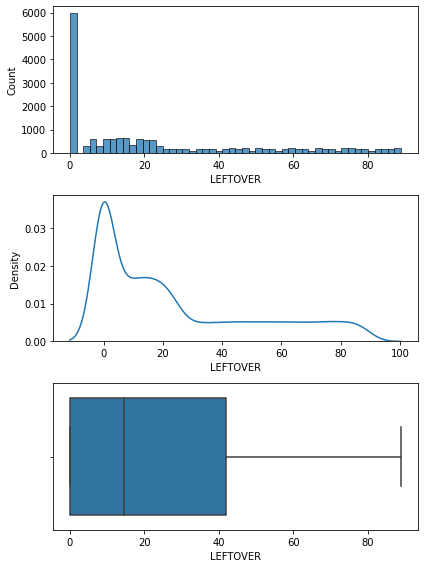

In [39]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile[var], bins = 50)

plt.subplot(3,1,2)
sns.kdeplot(mobile[var])

plt.subplot(3,1,3)
sns.boxplot(mobile[var])

plt.tight_layout()
plt.show()

7) 분석내용
    - 잔여시간이 0인 고객들이 많음
    - 0을 제외하고 2% ~ 25% 정도 남는 고객들이 많다 => 애매하게 남음 
    - => 다음 달 요금에 남은 만큼 할인? 또는 이월 혜택 적용 가능
    - 30% 이상부터는 많이 남는다고 생각 => 요금제 변환
    - 추가 분석내용
        - 이탈 여부와 잔여시간의 관계

### 3) HANDSET_PRICE ( 핸드폰 가격 (달러))

In [40]:
var = 'HANDSET_PRICE'

1) 변수의 비즈니스 의미
    * 연 수입액(단위 : 달러) 
    * feature
2) 숫자, 범주?
    * 숫자
3) NaN 존재 유무 및 조치방안
    * NAN 없음
4) 가변수화 필요 여부
    * 필요 없음

In [41]:
mobile[var].isna().sum()

0

5) 기초통계량(수치화)

In [42]:
mobile[var].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


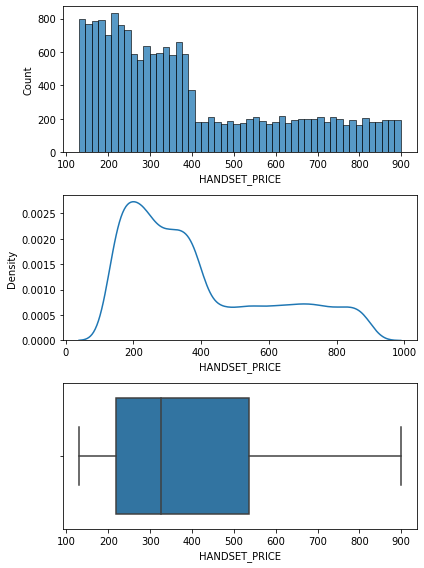

In [45]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile[var], bins = 50)

plt.subplot(3,1,2)
sns.kdeplot(mobile[var])

plt.subplot(3,1,3)
sns.boxplot(mobile[var])

plt.tight_layout()
plt.show()

7) 분석내용
    - 핸드폰 가겨의 평균 값은 390달러 => 하지만 대표값이 될 수는 없음
    - 특히 120 ~ 400달러 사이 사용자들이 많다.
    - 핸드폰 가격이 이탈 여부와 관련이 있을까? => 통신사 할인, 번호이동 등 할인 혜택을 받기위해 가능!
    - 추가 분석내용
        

### 4) REPORTED_SATISFACTION(만족도 설문)

In [46]:
var = 'REPORTED_SATISFACTION'

1) 변수의 비즈니스 의미
    * 만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) 
    * feature
2) 숫자, 범주?
    * 범주
3) NaN 존재 유무 및 조치방|안
    * NAN 38개 존재
    * 소수이므로 notnull을 이용해 빼고 분석
4) 가변수화 필요 여부
    * 필요 없음

In [52]:
mobile[var].isna().sum()
temp = mobile.loc[mobile[var].notnull()]

5) 기초통계량(수치화)

In [56]:
print('*******범주별 빈도수**************')
print(temp[var].value_counts())
print('*******범주별 비율**************')
# 범주별 비율
print(temp[var].value_counts() / temp[var].shape[0])

*******범주별 빈도수**************
very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
*******범주별 비율**************
very_unsat    0.393720
very_sat      0.253981
unsat         0.199866
avg           0.100546
sat           0.051887
Name: REPORTED_SATISFACTION, dtype: float64


6) 분포 확인(시각화)

In [57]:
cnt = mobile[var].value_counts()

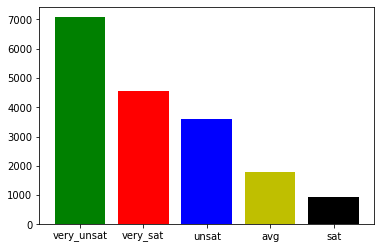

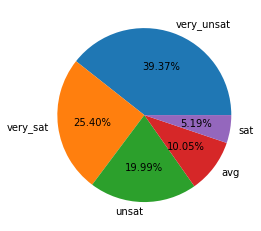

In [64]:
plt.bar( cnt.index, cnt.values, color = ['g','r','b','y','black'])
plt.show()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

7) 분석내용
    - 매우 불만족이 39.37%, 불만족이 19.99%, 보통 10.05%, 만족 5.19%, 매우만족 25.40%
    - 불만족이 가장 많이 나온 것으로 보아 서비스 측면이나 가격적 측면에서 보완이 필요함
    - 고객의 불편한 서비스를 빠른 시일안에 처리하면 만족 비율이 올라가지 않을까?
    - 추가분석사항
        - 어떤 측면에서 불만족인지 범주형으로 서비스 내용을 나눠서 분석해볼 필요가있음.

### 5) CONSIDERING_CHANGE_OF_PLAN (변경 계획 설문)

In [65]:
var = 'CONSIDERING_CHANGE_OF_PLAN'

1) 변수의 비즈니스 의미
    * 변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')
    * feature
2) 숫자, 범주?
    * 범주
3) NaN 존재 유무 및 조치방안
    * 없음
4) 가변수화 필요 여부
    * 필요함
    * 변경을 하고싶은 마음을 점수0,1,2,3,4 점수로 표현
    * ('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')을 순서대로 
    * [0,1,2,3,4] 순으로 숫자로 표시함
    

In [73]:
mobile.CONSIDERING_CHANGE_OF_PLAN = pd.Categorical(mobile.CONSIDERING_CHANGE_OF_PLAN, ['never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it'])
mobile.CONSIDERING_CHANGE_OF_PLAN = mobile.CONSIDERING_CHANGE_OF_PLAN.cat.codes

5) 기초통계량(수치화)

In [80]:
# 범주별 빈도수
print(mobile[var].value_counts())
print('***************************')
# 범주별 비율
print(mobile[var].value_counts() / mobile[var].shape[0])

3    7141
4    4453
1    3644
0    1804
2     958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
***************************
3    0.396722
4    0.247389
1    0.202444
0    0.100222
2    0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


6) 분포 확인(시각화)

In [81]:
cnt = mobile[var].value_counts()

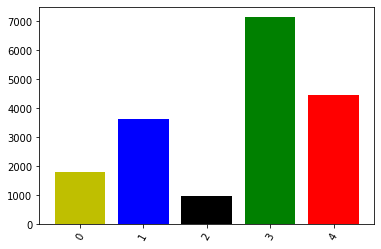

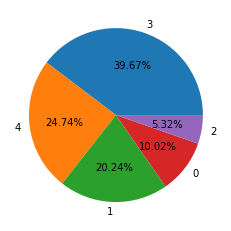

In [79]:
plt.bar( cnt.index, cnt.values, color = ['g','r','b','y','black'])
plt.xticks(rotation=60)
plt.show()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

7) 분석내용
    - 0: 10.02%, 1: 20.24%, 2: 5.32%, 3: 39.67%, 4: 24.74%
    - 바꾸고 싶은 마음인 3,4 가 60퍼를 넘기고 있음 => 무슨이유?? 만족도와 비교해서 볼 필요가 있음
    - 0,1 사람들에게 통신사의 장점, 마음에 드는 점을 파악해서 비즈니스 적으로 발전시켜야함
    - 추가분석사항
        - 만족도와 범주 vs 범주로 비교해서 관계를 파악해야함.

### 6) AVERAGE_CALL_DURATION (평균 통화시간(분))

In [82]:
var = 'AVERAGE_CALL_DURATION'

1) 변수의 비즈니스 의미
    * 평균 통화시간(분)
    * feature
2) 숫자, 범주?
    * 숫자
3) NaN 존재 유무 및 조치방안
    * 없음
4) 가변수화 필요 여부
    * 필요없음

In [88]:
mobile[var].isna().sum()

0

5) 기초통계량(수치화)

In [83]:
mobile[var].describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


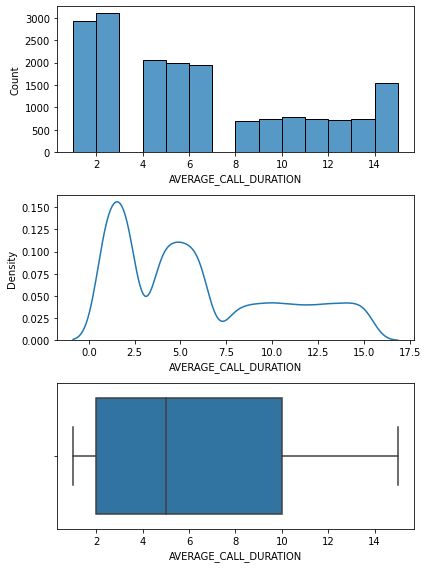

In [87]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile[var], bins = 14)

plt.subplot(3,1,2)
sns.kdeplot(mobile[var])

plt.subplot(3,1,3)
sns.boxplot(mobile[var])

plt.tight_layout()
plt.show()

7) 분석내용
    - 8분을 넘어가면서 급격히 분포가 작아지고 있음 
    - 14분을 넘어가면서 살짝 높아지고 있음 => 특정 사업인 ,직장에 관련된 고객들 일수도 있음 또한 연애의 가능성도 있음
    - => 평균 전화가 높게 나오는 고객들을 위한 서비스가 존재할까?
    - 보통 2분 내외, 4~6분 정도 통화하는 것으로 보임
    - 추가 분석내용
        - 평균통화별 만족도 설문이나 변경 계획 설문을 볼 필요가 있음

### 7) CHURN(target) - 이탈여부

In [5]:
var = 'CHURN'

1) 변수의 비즈니스 의미
    * 이탈여부(1: 이탈, 0: 잔류) 
    * Target
2) 숫자, 범주?
    * 범주
3) NaN 존재 유무 및 조치방안
    * NAN 없음
4) 가변수화 필요 여부
    * 필요 없음
    

In [6]:
mobile[var].isna().sum()

0

5) 기초통계량(수치화)

In [12]:
# 범주별 빈도수
print(mobile[var].value_counts())
print('***************************')
# 범주별 비율
print(mobile[var].value_counts() / mobile[var].shape[0])

0    9131
1    8869
Name: CHURN, dtype: int64
***************************
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


### 8) OVERAGE

In [147]:
var = 'OVERAGE'

1) 변수의 비즈니스 의미
    * 월 초과사용 시간(분)
    * feature
2) 숫자, 범주?
    * 숫자
3) NaN 존재 유무 및 조치방안
    * NAN 있음
    * 마이너스 값이 존재 => 0 보다 큰 값만 조회 => 0인 데이터도 무시
4) 가변수화 필요 여부
    * 필요 없음

In [161]:
mobile[var].loc[mobile[var]< 0].count()

1

In [162]:
temp = mobile.loc[mobile[var]> 0]

5) 기초통계량(수치화)

In [163]:
temp[var].describe()

count    11883.000000
mean       130.292771
std         73.651705
min          3.000000
25%         60.000000
50%        132.000000
75%        200.000000
max        335.000000
Name: OVERAGE, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


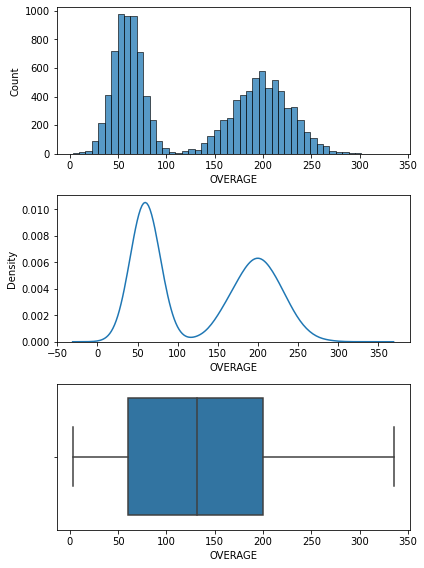

In [164]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(temp[var], bins = 50)

plt.subplot(3,1,2)
sns.kdeplot(temp[var])

plt.subplot(3,1,3)
sns.boxplot(temp[var])

plt.tight_layout()
plt.show()

7) 분석내용
    - 0인 데이터가 대부분임 그래서 0인 데이터는 빼고 분석
    - 두개의 그룹이 보인다 => 0~100분 , 100분~300분 => 일반인 사용자와 전화가 많이 필요한 부류
    - 각 그룹에 특별한 서비스 혜택이나 추천 요금제가 필요할 수도 있다.
    - 추가 분석내용
        - 두개의 그룹을 어떻게 나눠볼 수 있을까?

6) 분포 확인(시각화)

In [18]:
cnt = mobile[var].value_counts()

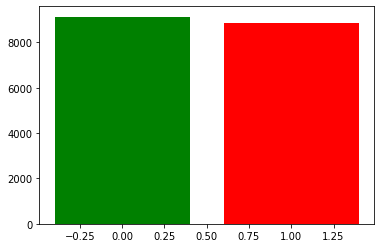

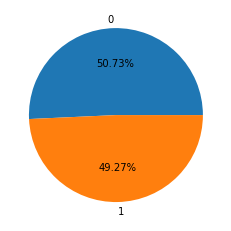

In [22]:
plt.bar( cnt.index, cnt.values, color = ['g','r'])
plt.show()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

7) 분석내용
    - 이탈여부가 거의 반반으로 분포 되어있다. => 이탈하지 않는다는 고객이 조금 더 많음
    - 생각보다 이탈할 것이라는 고객이 많음
    - 추가분석사항
        - 지역별로 이탈 여부를 확인

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [89]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) REPORTED_SATISFACTION --> CHURN

In [174]:
feature = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

In [175]:
temp = pd.crosstab( mobile[feature],mobile[target], normalize = 'columns')
temp

CHURN,0,1
REPORTED_SATISFACTION,,
avg,0.104466,0.096508
sat,0.053989,0.049723
unsat,0.196642,0.203187
very_sat,0.256118,0.251780
very_unsat,0.388785,0.398802


② 시각화( Stacked Bar, Mosaic)

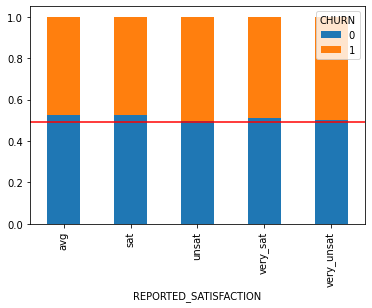

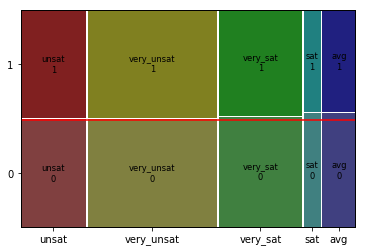

In [177]:
temp = pd.crosstab( mobile[feature],mobile[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(mobile[target].mean(), color = 'r')# 이탈여부율 평균선
plt.show()

mosaic(mobile, [ feature,target])
plt.axhline(mobile[target].mean(), color = 'r')# 이탈여부율 평균선
plt.show()

③ 가설검정(카이제곱검정)

In [96]:
# 먼저 집계
table = pd.crosstab(mobile[feature],mobile[target])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 6.841100957205645
p-value 0.14452738878905058
자유도 4


④ 시각화와 가설검정을 통해서 파악한 내용

* 그래프와 교차표를 봤을 때
    * 이탈 여부 평균 값과 만족도 조사 평균 값들이 얼마 차이가 안남
    * 그래프로는 차이가 없는 걸로 확인됨
    * 교차표에서는 매우 불만족에서 이탈여부가 더 많은 것으로 보임
    * 고객의 불편한 서비스를 빠른 시일안에 처리하면 만족 비율이 올라갈 것으로 보임
* 가설검정
    * 카이제곱통계량이 작은 값으로 나오고 p - value 또한 0.14로 0.05보다 크다
    * 가설검정을 통해서도 관련이 있어보이진 않는다.
* 결론
    *  이직율과 약한 관계인 REPORTED_SATISFACTION
    *  과연 만족도 설문이 이탈에 관여하지 않을까? 의문이 듬
    * => 만족도 설문과 변경 계획 설문과 비교를 해봐야함
    * => 아직 변경을 안 했지만 변경 계획이 있을지 모르기 때문이다.
    

#### 2) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [181]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

① 교차표(pd.crosstab())

In [182]:
temp = pd.crosstab( mobile[feature],mobile[target], normalize = 'columns')
temp

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
0,0.101413,0.098997
1,0.199650,0.205322
2,0.049940,0.056602
3,0.399518,0.393844
4,0.249480,0.245236


② 시각화( Stacked Bar, Mosaic)

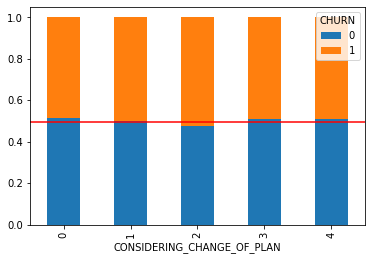

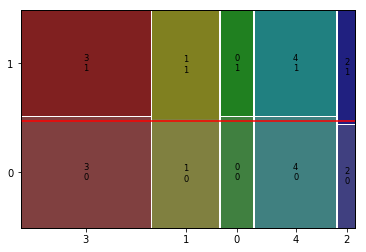

In [184]:
temp = pd.crosstab( mobile[feature],mobile[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(mobile[target].mean(), color = 'r')# 이탈여부율 평균선
plt.show()

mosaic(mobile, [ feature,target])
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

③ 가설검정(카이제곱검정)

In [100]:
# 먼저 집계
table = pd.crosstab(mobile[feature],mobile[target])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 5.421434419620688
p-value 0.24672225866799702
자유도 4


④ 시각화와 가설검정을 통해서 파악한 내용

* 그래프로 봤을 때
    * 이탈 여부 평균 값과 변경계획 값들이 얼마 차이가 안남
    * 그래프로는 차이가 없는 걸로 확인됨
* 가설검정
    * 카이제곱통계량이 작은 값으로 나오고 p - value 또한 0.24로 0.05보다 크다
    * 가설검정을 통해서도 관련이 있어보이진 않는다.
* 결론
    *  이직율과 약한 관계인 CONSIDERING_CHANGE_OF_PLAN
    *  과연 변경 계획 설문과 이탈에 관여하지 않을까? 의문이 듬
    * => 만족도 설문과 변경 계획 설문과 비교를 해봐야함
    * => 아직 변경을 안 했지만 변경 계획이 있을지 모르기 때문이다.
    * 만족도 설문과 비슷한 결과라고 생각함

In [137]:
temp = pd.crosstab( mobile['REPORTED_SATISFACTION'],mobile['CONSIDERING_CHANGE_OF_PLAN'], normalize = 'columns')
temp

CONSIDERING_CHANGE_OF_PLAN,0,1,2,3,4
REPORTED_SATISFACTION,,,,,
avg,0.107778,0.102501,0.086911,0.096462,0.105488
sat,0.049444,0.053037,0.054450,0.051530,0.051957
unsat,0.194444,0.206925,0.183246,0.196855,0.204678
very_sat,0.262778,0.253916,0.248168,0.254985,0.250112
very_unsat,0.385556,0.383622,0.427225,0.400168,0.387764


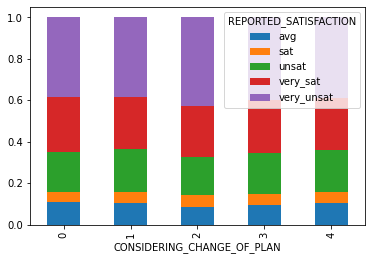

In [141]:
temp = pd.crosstab( mobile['CONSIDERING_CHANGE_OF_PLAN'],mobile['REPORTED_SATISFACTION'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.show()


* 추가분석 사항 (만족도 조사와 변경계획설문 의 관계)
    * 서로 관련은 없는 것 같아보임


#### 3) COLLEGE	 --> CHURN

In [131]:
feature = 'COLLEGE'

① 교차표(pd.crosstab())

In [132]:
temp = pd.crosstab( mobile[feature],mobile[target], normalize = 'columns')
temp

CHURN,0,1
COLLEGE,,
0,0.505531,0.488781
1,0.494469,0.511219


② 시각화( Stacked Bar, Mosaic)

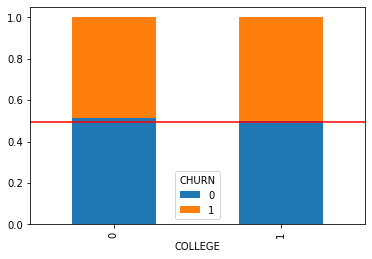

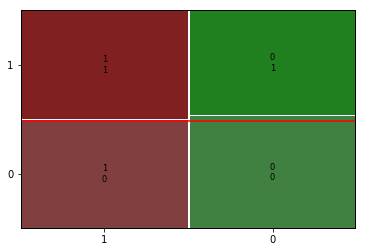

In [133]:
temp = pd.crosstab( mobile[feature],mobile[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(mobile[target].mean(), color = 'r')# 이탈여부율 평균선
plt.show()

mosaic(mobile, [ feature,target])
plt.axhline(mobile[target].mean(), color = 'r')# 이탈여부율 평균선
plt.show()

③ 가설검정(카이제곱검정)

In [134]:
# 먼저 집계
table = pd.crosstab(mobile[feature],mobile[target])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 4.982102934693502
p-value 0.02561083347822053
자유도 1


④ 시각화와 가설검정을 통해서 파악한 내용

* 그래프로 봤을 때
    * 이탈 여부 평균 값과 졸업 여부 평균 값들이 얼마 차이가 안남
    * 그래프로는 차이가 없는 걸로 확인됨
* 가설검정
    * 카이제곱통계량이 4.9로 나오면서 자유도 보다 2~3배 큰 것을 볼 수 있다.
    * 가설검정을 통해서는 그래프 보단 차이가 있다는 것이 더 보인다.
* 결론
    *  이직율과 약한 관계인 COLLEGE
    * 대학 졸업을 하면서 독립을 하고 통신사를 옮겨갈수 도 있음

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) LEFTOVER --> CHURN


In [106]:
feature ='LEFTOVER'

① 그래프 : histogram, densityplot

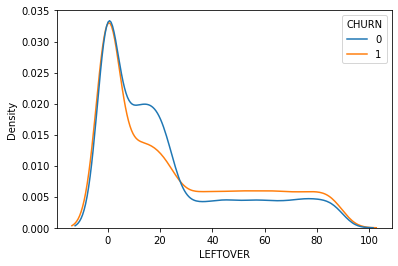

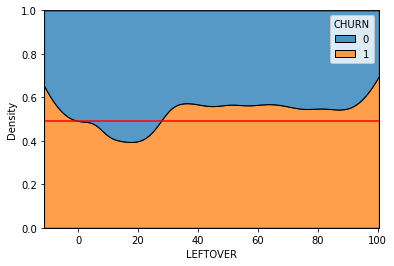

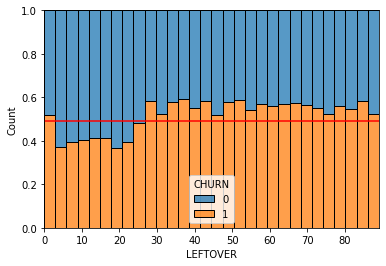

In [109]:
sns.kdeplot(x=feature,data=mobile,hue=target,common_norm=False)
plt.show()

sns.kdeplot(x=feature, data = mobile, hue =target
            , multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r') # 이탈여부율 평균선
plt.show()

sns.histplot(x= feature, data = mobile, bins = 30
            , hue =target, multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

② 수치화 : 로지스틱회귀

In [108]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해서 파악한 내용

* 그래프로 봤을 때
    * 월 사용시간이 25%을 넘어서면서 이탈율이 평균 값을 넘어서고 있다.
    * => 시간이 남아서 아깝다고 생각해서 이탈??, 다양한 요금제 선택이 없나? 자신한테 알맞은 요금제 선택이 중요
    * 월 사용시간이 0분인 데이터에서 평균 값을 넘고 있다 => 사용시간이 모자라서 이탈한 것으로 추정
    * 월 사용 잔여시간에 따라 이탈율이 차이가 있다.
* 수치화
    * 로지스틱회귀 값이 0.000003으로 큰 차이를 보이진 않지만 차이가 있다는 것을 알 수 있다.
    * 단, 로지스틱회귀는 미봉책으로 너무 의존하면 안 되지만 그래프와 함께 보면서 판단!
* 결론
    *  이탈율과 중간 관계인 LEFTOVER 
    * 이탈율이 평균값을 넘는 25%라는 값을 유심히 볼 필요가 있음

#### 2) HANDSET_PRICE --> CHURN


In [110]:
feature ='HANDSET_PRICE'

① 그래프 : histogram, densityplot

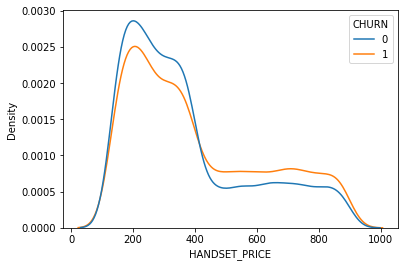

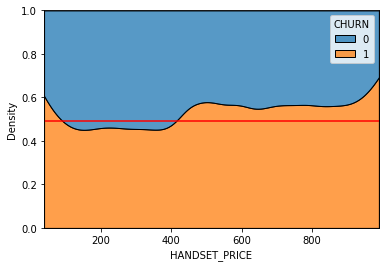

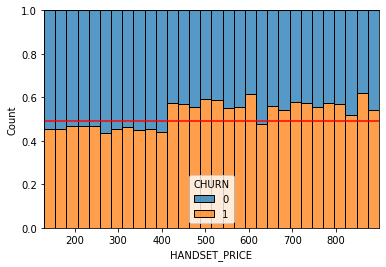

In [111]:
sns.kdeplot(x=feature,data=mobile,hue=target,common_norm=False)
plt.show()

sns.kdeplot(x=feature, data = mobile, hue =target
            , multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r') # 이탈여부율 평균선
plt.show()

sns.histplot(x= feature, data = mobile, bins = 30
            , hue =target, multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

② 수치화 : 로지스틱회귀

In [112]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


③  시각화와 수치화를 통해서 파악한 내용

* 그래프로 봤을 때
    * 핸드폰 가격이 400달러를 넘어서면서 이탈율이 평균 값을 넘어서고 있다.
    * => 요즘 신제품의 평균적인 가격일까? => 핸드폰을 신제품으로 바꾸면서 이탈할 수도 있음
    * => 아니면 핸드폰 가격이 부담되는 시점일수도!, 자급제 등으로 이탈할 수도 있음
    * 핸드폰 가격에 따라 이탈율이 차이를 보이고 있음 => 큰 차이는 아니다.
* 수치화
    * 로지스틱회귀 값이 0.000107으로 큰 차이를 보이진 않지만 차이가 있다는 것을 알 수 있다.
    * 단, 로지스틱회귀는 미봉책으로 너무 의존하면 안 되지만 그래프와 함께 보면서 확인
* 결론
    * 이탈율과 중간 관계인 HANDSET_PRICE
    * 이탈율이 평균값을 넘는 400달러라는 값을 유심히 볼 필요가 있음
    * LEFTOVER와 비슷한 결과를 나타내고 있다.

#### 3) AVERAGE_CALL_DURATION --> CHURN


In [113]:
feature='AVERAGE_CALL_DURATION'

① 그래프 : histogram, densityplot

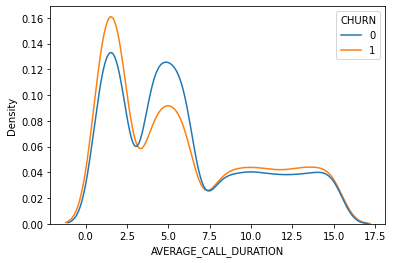

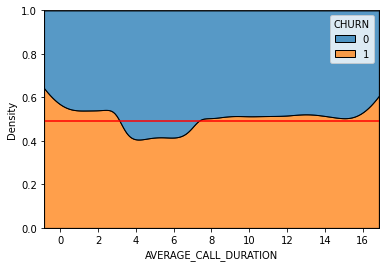

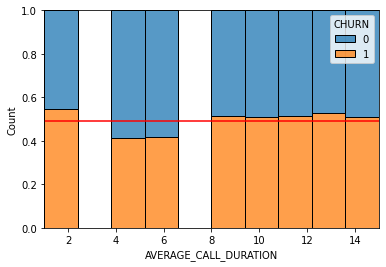

In [118]:
sns.kdeplot(x=feature,data=mobile,hue=target,common_norm=False)
plt.show()

sns.kdeplot(x=feature, data = mobile, hue =target
            , multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r') # 이탈여부율 평균선
plt.show()

sns.histplot(x= feature, data = mobile, bins = 10
            , hue =target, multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

② 수치화 : 로지스틱회귀

In [115]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


③  시각화와 수치화를 통해서 파악한 내용

* 그래프로 봤을 때
    * 평균 통화시간이 2분 내외 와 8분 이후 부터는 평균 이탈율을 넘어서고 있다.
    * 4~6분내외 이탈율이 적은 것을 확인 할 수 있다.
    * 평균 통화시간이 길면 곧 요금제 비용이 올라감 => 맞춤 요금제가 필요하다
    * => 컬러링 등 통화와 관련된 서비스 제공
* 수치화
    * 로지스틱회귀 값이 0.03783으로 차이가 없다고 하기에는 낮은 값을 보이고 있다.
* 결론
    * 이탈율과 약한 관계인 AVERAGE_CALL_DURATION

#### 3) OVERAGE --> CHURN

In [165]:
feature ='OVERAGE'

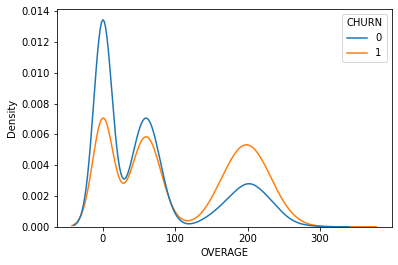

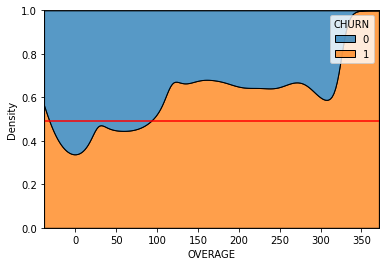

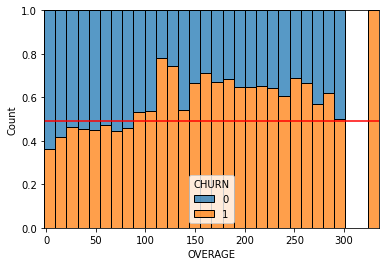

In [168]:
sns.kdeplot(x=feature,data=mobile,hue=target,common_norm=False)
plt.show()

sns.kdeplot(x=feature, data = mobile, hue =target
            , multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r') # 이탈여부율 평균선
plt.show()

sns.histplot(x= feature, data = mobile, bins = 30
            , hue =target, multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

② 수치화 : 로지스틱회귀

In [145]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


③  시각화와 수치화를 통해서 파악한 내용

* 그래프로 봤을 때
    * 초과시간이 80분 부터 이탈율이 평균보다 높아지고 있음
    * => 고객들이 느끼는 요금제 부족의 한계치라고 생각함, 맞춤 요금제가 필요할 것으로 보임
    * 300분 넘어서는 이상치 데이터로 보이기 때문에 무시
     
* 수치화
    * 로지스틱회귀 값이 차이가 크다는 것을 알 수 있다.
    * 단, 로지스틱회귀는 미봉책으로 너무 의존하면 안 되지만 그래프와 함께 보면서 판단!
* 결론
    * 이탈율과 강한 관계인 OVERAGE
    * => 초과시간이 많을 수록 고객들에게 추가 가격 할인을 제공하면 어떨까?
    * 초과 사용 시간이 300분에서 갑자기 이탈율이 감소하는 이유를 더 알아봐야함


## 4.관계 정리

### 1) 강한관계의 변수

* OVERAGE
* 강한 보다는 중간관계(LEFTOVER , HANDSET_PRICE)

### 2) 약한관계의 변수

* COLLEGE , AVERAGE_CALL_DURATION 

### 3) 관계 없음

* REPORTED_SATISFACTION ,CONSIDERING_CHANGE_OF_PLAN  

## 5.추가 분석